# Step 4: Smoothing
The final step in a standard fMRI pre-processing pipeline is to *smooth* the motion-corrected, slice-timing-corrected and normalised data. We already discussed smoothing as part of image filtering earlier in the course. However, it is worth taking some time to discuss *why* we want to smooth our functional data as, on the face of it, smoothing appears to be a destructive step that reduces the resolution of the function data even further, as shown in {numref}`smooth-ex-fig`.

```{figure} images/smoothing-example.png
---
width: 500px
name: smooth-ex-fig
---
Illustration of the results of Gaussian smoothing,
```

## Why Smooth fMRI Data?
Generally speaking, there are three main reasons for smoothing fMRI data. The first is to improve the signal-to-noise ratio of the image by reducing noise through averaging neighbouring voxels. The second is to improve some of the limitations of spatial normalisation, and the third is to meet the minimal smoothness requirements of certain statistical techniques that we will discuss later on the course. 

### Reducing Noise
Recall from earlier in the course that we can think of image filters in either the *spatial* or *frequency* domains. In the spatial domain, convolution of an image and a Gaussian kernel results in a *weighted-averaging* of neighbouring voxels. In the frequency-domain, a Gaussian kernel corresponds to a low-pass filter, removing high-frequency information from the image. Both of these perspectives provide insight into one of the main reasons for filtering, which is to improve the signal-to-noise ratio of the signal that underlies the image. In the spatial domain, small changes of signal intensity from voxel-to-voxel will effectively cancel within the convolution process. If these changes correspond to random noise, they will consist of both signal increases and decreases, hence why the values will cancel when averaged. In comparison, large-scale changes that are consistent across multiple voxels will remain after convolution. The general idea is that noise will tend to change from voxel-to-voxel, whereas true signal will remain relatively stable across voxels. As such, smoothing should help reduce the noise and thus make the true signal easier to detect. This is illustrated in {numref}`smooth-spatial-fig`. The top plot shows the spatial signal taken from a single row of a single slice of a functional image. Notice that there is a general shape to the signal, but also plenty of small perturbations. Our assumption is that this general shape is the true signal and that the smaller changes on top of this shape correspond to noise. As the size of the smoothing kernel increases, we can see that this general shape becomes more pronounced with the small changes decreasing. As such, we are reducing the noise in favour of the true signal.

```{figure} images/smooth-noise.png
---
width: 650px
name: smooth-spatial-fig
---
Illustration of how smoothing changes the spatial signal of an image.
```

A connection can also be made here with the frequency-domain view of filtering. From this perspective, we are removing *high-frequency* spatial information from the image. This high-frequency information corresponds to fast changes in the signal from voxel-to-voxel and is therefore assumed to correspond to noise. Low-frequency spatial information corresponds to the more general shape of the signal across multiple voxels and is therefore assumed to correspond to the true signal. Removal of the high-frequency information in favour of the low-frequency information therefore has the effect of smoothing the image. This idea of low-pass filtering also explains why smoothing has the visual effect that it does, because detail in an image corresponds to high-frequency information. Removing high-frequency information therefore removes detail from the image and thus makes it look blurry. 

```{note}
The discussion above about high-frequency information and image detail also provides insight into why images will appear blurrier after interpolation. Even though interpolation methods can increase the resolution of an image, they will not add more information to the image. This is because the interpolated values are entirely dependant upon the values already in the image. As such, interpolation cannot add *detail* to an image that was not already there. We can see this when we consider that most interpolation methods use a *smooth* interpolation function through the original data. This is effectively *low*-frequency information. As such, an interpolated image will tend to produce a blurry result. A similar effect occurs when a standard definition signal on a television is interpolated to high-definition. The image fills the larger screen, but does not look like a high-definition signal because it does not contain any more detail. This is where AI upscaling differs from basic interpolation, as these methods seek to infer detail that was not already in the image.
```

### Improving Normalisation
In addition to reducing noise, smoothing can help overcome some of the limitations of spatial normalisation. One of the most obvious visual effects of smoothing is that the anatomical boundaries within the brain become harder to discern. This is because the boundaries have been effectively spread in all directions. Although this may seem like an issue from a localisation perspective, it is actually an advantage because it helps overcome some of the limitations of spatial normalisation. Because normalisation will never be perfect, especially when constrained by regularisation, the anatomy of different subjects will never perfectly overlap. Because of this, regions of activation will also be slightly mismatched across subjects. However, by smoothing the data, we can even-out some of this discrepancy such that regions of activation better overlap across subjects. This consistency of overlap across subjects is very important for the statistical analysis of groups, meaning we are more likely to see effects if the activation pattern is consistent in terms of its spatial location. Although such consistency is improved by normalisation, it can be improved further by applying spatial smoothing. As such, smoothing also helps in terms of improving the *consistency* of anatomical alignment across subjects.

### Meeting the Staistical Assumptions
Beyond reducing noise and improving spatial consistency, smoothing is also necessary to meet some of the statistical assumptions we will be discussing later on the course. We will not go into much detail for now, but when we come to methods of *multiple comparisons correction* we will come across a technique known as *Gaussian Random Field Correction*. This is the primary correction technique used by SPM to calculate the statistical analysis results. In order for this correction to be valid, there is an assumed level of smoothness in the data. Although all fMRI images will contain an inherent amount of smoothness, in order to guarantee that the minimum smoothness assumption is met we can apply additional smoothing to the image. For this purpose alone, a kernel size of only twice the voxel dimensions is needed ([Mikl *et al.*, 2008](https://pubmed.ncbi.nlm.nih.gov/18060720/)), though typically larger kernels will be used. Nevertheless, meeting these statistical assumptions provides the third main justification for smoothing fMRI data.

## Gaussian Kernels
As we know from earlier on the course, smoothing is performed with the use of a Gaussian kernel. These kernels are parameterised in terms of the *full width at half maximum* (FWHM), rather than the usual mean and standard deviation associated with the Gaussian distributions. {numref}`gauss-kernel-fig` illustrates the connection between these concepts.

```{figure} images/kernel-sd-fwhm.png
---
width: 650px
name: gauss-kernel-fig
---
Illustration of the connection between the standard deviation and the FWHM of a Gaussian kernel.
```

The FWHM is specified in millimetres and can be thought of as the *spatial extent* of the kernel. As shown in {numref}`gauss-kernel-fig`, this is associated with around 70% of the mass of the kernel. The larger the FWHM, the wider the kernel becomes and the greater the number of neighbouring voxels that are averaged-together. Of particular interest is *why* a Gaussian kernel is chosen, rather than simply averaging together voxels within a certain neighbourhood? To see why, consider the illustration in {numref}`gauss-box-fig`. The top row shows Gaussian smoothing, with the middle and bottom rows showing the result of simple voxel avergaing, using a box kernel. As we can see, the Gaussian kernel produces a much smoother and continuous result than the box kernel. Because the aim of smoothing is to recover the spatial signal before the addition of noise, it makes more sense to use a method that produces a signal that is a continuous function of time, rather than a signal that contains perturbations and discontinuities. The Gaussian kernel achieves this due to its gradual roll-off at the edges, making it a better fit than a box kernel.

```{figure} images/gauss-box.png
---
width: 650px
name: gauss-box-fig
---
Illustration of the difference between a Gaussian kernel and a simple averaging (box) kernel.
```

## How Much to Smooth fMRI Data?
Although smoothing is advantageous, we do have to exercise some caution. As already alluded to, smoothing can cause issues for the localisation of results because of the fact that boundaries become harder to discern as activation patterns are blurred across a wider area of the brain. This can mean activation in grey matter gets moved into white matter, ventricles or even outside the brain. In addition, activation can appear larger than it was originally, and places where activation patterns are separate can become combined. This can give a false sense of the location and spatial extent of findings. This is illustrated in {numref}`smooth-size-fig`, where the effects of larger smoothing kernels becomes clear. The only caveat here is that smoothing more than 8mm is rare and so the 16mm and 32mm FWHM examples are just to illustrate the effects of extreme smoothing.

```{figure} images/kernel-sizes.png
---
width: 650px
name: smooth-size-fig
---
Illustration of the effects of smoothing on the activation patterns in fMRI results. Notice how the highlighted clusters grow in size, combine into a single cluster and then disappear as the smoothing kernel size increases.
```

Given these issues, how much should we smooth? Unfortunately, there is no simple answer. By default, SPM chooses a FWHM of 8mm and for most use cases this can be retained. You may wish to reduce the kernel size if you are focusing on small regions of the brain where the extent of the activation is expected to be below 8mm. When doing so, a minimum of 2 times the voxel dimensions is recommended in order to meet the statistical assumptions mentioned earlier. Typically, for fMRI data, this will result in a kernel anywhere between 4mm and 8mm FWHM. For more information on the influence of difference kernel sizes, consult the investigation by [Mikl *et al.*, 2008](https://pubmed.ncbi.nlm.nih.gov/18060720/).

## Smoothing Functional Data in SPM

Now that we have discussed the theory of spatial smoothing, we can examine how to perform this step using SPM.

### Using the Graphical Batch System

The video below will demonstrate how to smooth the realigned, slice-timing-corrected and normalised functional data, using the SPM graphical interface.

<div style="max-width: 1280px"><div style="position: relative; padding-bottom: 56.25%; height: 0; overflow: hidden;"><iframe src="https://livemanchesterac.sharepoint.com/sites/UOM-FBMH-MSc-NCCN/_layouts/15/embed.aspx?UniqueId=8bbcc80c-36fb-4cf4-96d4-ad5c0d79e832&embed=%7B%22hvm%22%3Atrue%2C%22ust%22%3Atrue%7D&referrer=StreamWebApp&referrerScenario=EmbedDialog.Create" width="1280" height="720" frameborder="0" scrolling="no" allowfullscreen title="6.Smoothing.mov" style="border:none; position: absolute; top: 0; left: 0; right: 0; bottom: 0; height: 100%; max-width: 100%;"></iframe></div></div>

### Using MATLAB Code
As with previous steps, it is also possible to perform spatial smoothing in code using the `spm_smooth` function. The code below shows how to replicate the functionality of the `Smooth` module from the video.

In [1]:
% Launch SPM
spm('defaults','FMRI');

% Load data
func = spm_vol('warIA_preproc_func.nii'); % motion, slice-timing and normalised

% Smooth with a kernel of [8 8 8]
spm_smooth(func,'swarIA_preproc_func.nii',[8 8 8]);

We can then check the results using


SPM12: spm_check_registration (v7759)              11:34:53 - 07/11/2023
Display warIA_preproc_func.nii,1
        swarIA_preproc_func.nii,1


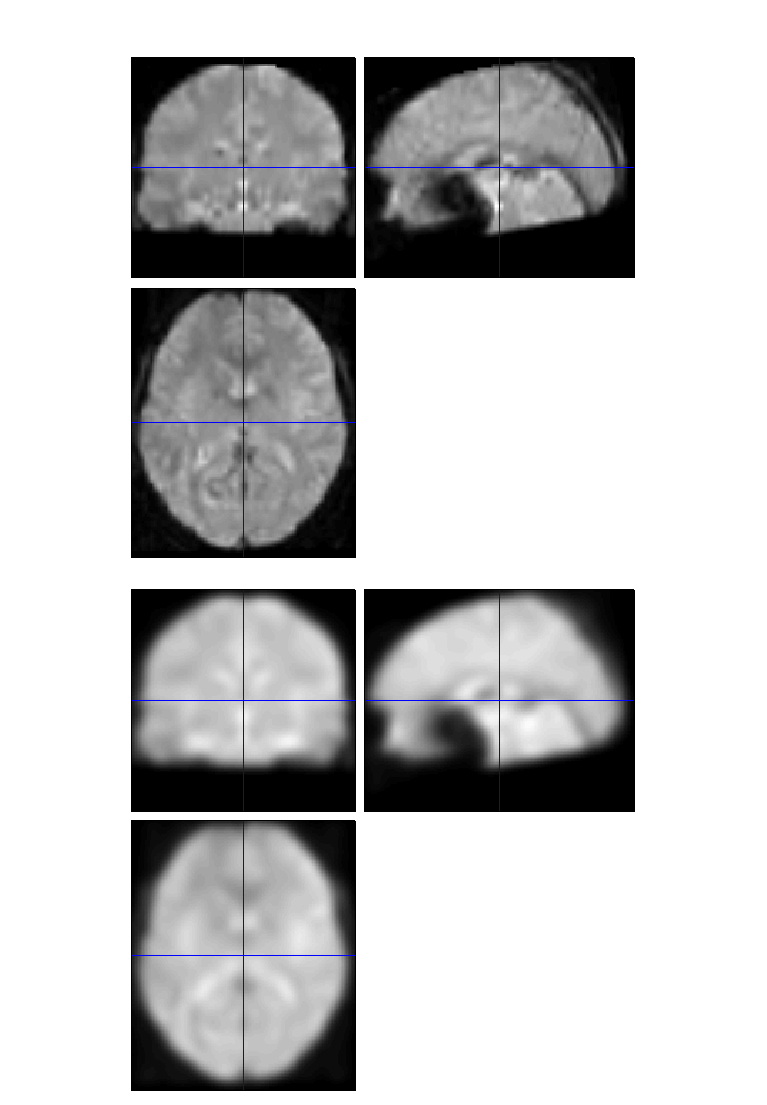

In [3]:
spm_check_registration('warIA_preproc_func.nii,1', ... % Unsmoothed
                       'swarIA_preproc_func.nii,1')    % Smoothed